In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=1.5, style='ticks')
import pandas as pd
from scipy.stats import ttest_ind
%load_ext autoreload
%autoreload 2
%matplotlib inline
hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s', 'jGCaMP7f', 'XCaMP-Gf']
hits_colors = ['#0000ff',  '#ff0000', '#666666', '#00ff00',  '#0099ff']
sensor_para = pd.read_csv('GCaMP8_exported_ROIs_s2f_full/GCaMP8s_para.csv')
idx = sensor_para['Type']
sensor_ephys_para = pd.read_csv('GCaMP8_exported_ROIs_s2f_full/GCaMP8s_para_ephys.csv')

## Figure E

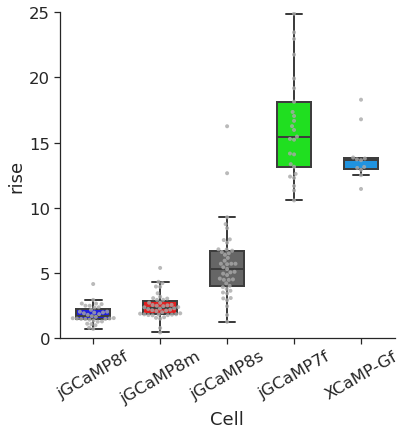

In [2]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='rise', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='rise', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 25])
plt.savefig('figures/tau_rise.pdf')
plt.show()

## Figure H

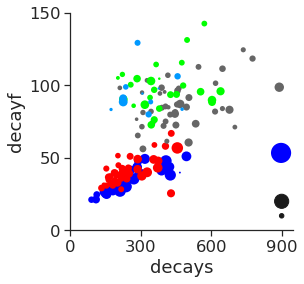

In [3]:
size_ = sensor_para['weight'][idx]*200 # this is just to make the dot size larger enough to visulize
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(data=sensor_para[idx], x='decays', y='decayf', hue='Cell', s=size_, palette = hits_colors, legend= False, linewidth=0)
plt.scatter([900, 900], [10, 20], s=[20, 200], c='k') # scales for r=.1 and r=1 respectively
sns.despine()
plt.ylim([0, 150])
plt.yticks(range(0, 180, 50))
plt.xlim([0, 950])
plt.xticks(range(0, 1200, 300))
plt.savefig('figures/tau_decay.pdf')
plt.show()

## Figure F

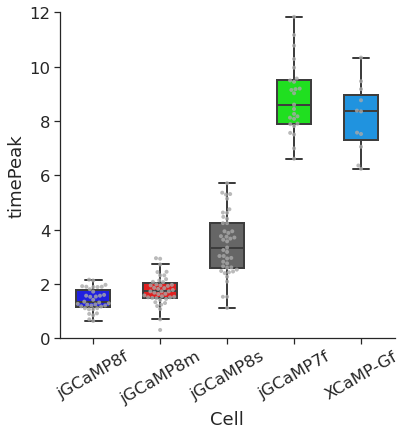

In [4]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='timePeak', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='timePeak', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 12])
plt.savefig('figures/timePeak.pdf')
plt.show()

## Figure I

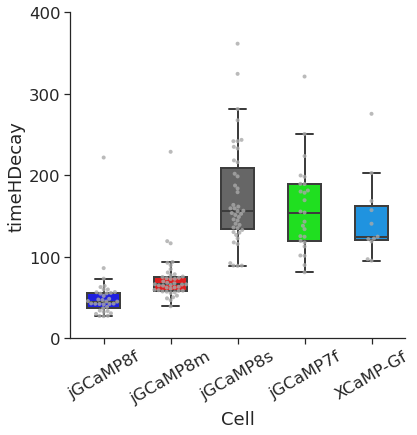

In [5]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='timeHDecay', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='timeHDecay', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 400])
plt.yticks(range(0, 500, 100))
plt.savefig('figures/timeHDecay.pdf')
plt.show()

## Figure J

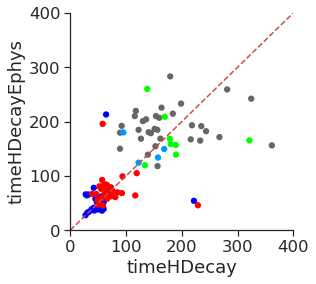

In [6]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=sensor_ephys_para, x='timeHDecay', y='timeHDecayEphys', hue='Cell', s=40, palette = hits_colors, legend= False, linewidth=0)
plt.plot([0, 500], [0, 500], '--r')
plt.ylim([0, 400])
plt.xlim([0, 400])
plt.xticks(range(0, 500, 100))
sns.despine()
plt.savefig('figures/timeHDecayEphys.pdf')
plt.show()

In [7]:
ttest_ind(sensor_ephys_para['timeHDecay'], sensor_ephys_para['timeHDecayEphys'])

Ttest_indResult(statistic=-0.5318342133176165, pvalue=0.5954370293362728)

## Figure G

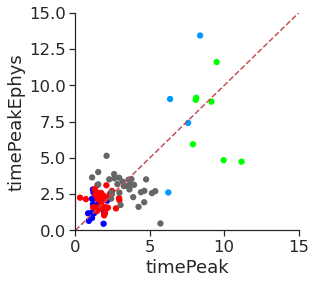

In [8]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=sensor_ephys_para, x='timePeak', y='timePeakEphys', hue='Cell', s=40, palette = hits_colors, legend= False, linewidth=0)
plt.plot([0, 30], [0, 30], '--r')
plt.ylim([0, 15])
plt.xlim([0, 15])
sns.despine()
plt.savefig('figures/timePeakEphys.pdf')
plt.show()

In [9]:
ttest_ind(sensor_ephys_para['timePeak'], sensor_ephys_para['timePeakEphys'])

Ttest_indResult(statistic=-0.22373110793379217, pvalue=0.823197212461563)